In [1]:
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from transformers import AutoModelForCausalLM, AutoTokenizer
from optimum.intel import OVModelForCausalLM

INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, onnx, openvino


In [2]:
def load_model_and_tokenizer(model_id, is_ov_model=False):
    if is_ov_model:
        model = OVModelForCausalLM.from_pretrained(model_id, export=True)
    else:
        model = AutoModelForCausalLM.from_pretrained(model_id,
                                                    )
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    return model, tokenizer

In [3]:
def track_memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.rss / (1024 ** 2)  # Return memory usage in MB

In [40]:
def generate_results(model, tokenizer, prompt, max_new_tokens=50):
    inputs = tokenizer(prompt, return_tensors="pt")
    start_time = time.time()
    outputs = model.generate(**inputs, max_new_tokens=max_new_tokens)
    end_time = time.time()
    
    # skip the prompt and inital format
    output_text = tokenizer.decode(outputs[0])[len(prompt)+5:]
    generation_time = end_time - start_time
    
    return output_text, generation_time

In [5]:
model_id_1 = "OjasPatil/intel-llama2-7b"
model_1, tokenizer_1 = load_model_and_tokenizer(model_id_1, is_ov_model=True)

model_id_2 = "OjasPatil/intel-llama2-7b"
model_2, tokenizer_2 = load_model_and_tokenizer(model_id_2, is_ov_model=False)

config.json:   0%|          | 0.00/630 [00:00<?, ?B/s]

Framework not specified. Using pt to export the model.


pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/183 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

Can't determine type of OV quantization config. Please specify explicitly whether you intend to run weight-only quantization or not with `weight_only` parameter. Creating an instance of OVWeightQuantizationConfig.
The model weights will be quantized to int8.
Using framework PyTorch: 2.3.0+cu121
Overriding 1 configuration item(s)
	- use_cache -> True
/data/venv/openvino_notebooks/openvino_2024.1.0_python3.10/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py:4371: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(
The cos_cached attribute will be removed in 4.39. Bear in mind that its contents changed in v4.38. Use the forward method of RoPE from now on instead. It is not used in the `LlamaAttention` class
The sin_cached attribute will be removed in 4.39. Bear in mind that its contents changed in v4.38. Use the forward method of RoPE from now on instead. It

INFO:nncf:Statistics of the bitwidth distribution:
┍━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┑
│   Num bits (N) │ % all parameters (layers)   │ % ratio-defining parameters (layers)   │
┝━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┥
│              8 │ 100% (226 / 226)            │ 100% (226 / 226)                       │
┕━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┙


Output()

Compiling the model to CPU ...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [41]:
user_prompt = "What is Intel OpenVINO?"
prompt = f"<s>[INST] {user_prompt} [/INST]"

In [46]:
output_text_1, time_model_1 = generate_results(model_1, tokenizer_1, prompt)
print(f"Time taken by Intel OpenVINO format Model : {time_model_1:.2f} seconds")
print(f"Output:\n{output_text_1}")

Time taken by Intel OpenVINO format Model : 6.38 seconds
Output:
Intel OpenVINO is an open-source software development kit for deploying and tracking deep learning models across various applications, environments, and platforms. It enables real-time communication between models and applications like PyTorch, TensorFlow,


In [47]:
output_text_2, time_model_2 = generate_results(model_2, tokenizer_2, prompt)
print(f"Time taken by usual format Model : {time_model_2:.2f} seconds")
print(f"Output:\n{output_text_2}")

Time taken by usual format Model : 15.64 seconds
Output:
Intel OpenVINO is an open-source software developed by Intel. It enables efficient deployment of deep learning models across diverse edge devices and environments. It also provides a platform for developing and deploying models and applications for various edge and inference use cases


## Now lets run this on 10 prompts

In [48]:
prompts = [
    "Do you give support for free Intel toolkits?",
    "How do I get access to Intel® Gaudi® 2 accelerators?",
    "what is intel OpenVINO?",
    "What kind of licenses are available for Intel MPI Library?",
    "What is the Intel® Developer Zone?",
    "How do I use Intel Gaudi accelerators with Docker* images or create my own Docker image?",
    "Will my Intel Parallel Studio XE still work after I transition to Intel toolkits?",
    "When is a Developer license required for Intel MPI Library?",
    "How to install Intel OpenVINO?",
    "What is Intel Optane technology?"
]

In [49]:
times_model_1 = []
times_model_2 = []

In [50]:
for i, prompt in enumerate(prompts, 1):
    print(f"\nPrompt {i}: {prompt}")

    # Generate output for model 1
    output_text_1, time_model_1 = generate_results(model_1, tokenizer_1, prompt)
    times_model_1.append(time_model_1)
    print(f"Time taken by Model 1: {time_model_1:.2f} seconds")

    # Generate output for model 2
    output_text_2, time_model_2 = generate_results(model_2, tokenizer_2, prompt)
    times_model_2.append(time_model_2)
    print(f"Time taken by Model 2: {time_model_2:.2f} seconds")
    print()


Prompt 1: Do you give support for free Intel toolkits?
Time taken by Model 1: 7.20 seconds
Time taken by Model 2: 14.92 seconds


Prompt 2: How do I get access to Intel® Gaudi® 2 accelerators?
Time taken by Model 1: 6.39 seconds
Time taken by Model 2: 15.01 seconds


Prompt 3: what is intel OpenVINO?
Time taken by Model 1: 6.24 seconds
Time taken by Model 2: 15.03 seconds


Prompt 4: What kind of licenses are available for Intel MPI Library?
Time taken by Model 1: 6.71 seconds
Time taken by Model 2: 14.97 seconds


Prompt 5: What is the Intel® Developer Zone?
Time taken by Model 1: 6.28 seconds
Time taken by Model 2: 15.23 seconds


Prompt 6: How do I use Intel Gaudi accelerators with Docker* images or create my own Docker image?
Time taken by Model 1: 6.76 seconds
Time taken by Model 2: 14.83 seconds


Prompt 7: Will my Intel Parallel Studio XE still work after I transition to Intel toolkits?
Time taken by Model 1: 6.83 seconds
Time taken by Model 2: 15.71 seconds


Prompt 8: When is

In [51]:
# Calculate average times
avg_time_model_1 = sum(times_model_1) / len(times_model_1)
avg_time_model_2 = sum(times_model_2) / len(times_model_2)

# Calculate the percentage difference
percentage_time_less = ((avg_time_model_2 - avg_time_model_1) / avg_time_model_2) * 100

print(f"\nAverage time taken by Model 1: {avg_time_model_1:.2f} seconds")
print(f"Average time taken by Model 2: {avg_time_model_2:.2f} seconds")
print()
print(f"Intel OpenVINO is {percentage_time_less:.2f}% more time efficient!!!")


Average time taken by Model 1: 6.63 seconds
Average time taken by Model 2: 15.08 seconds

Intel OpenVINO is 56.03% more time efficient!!!


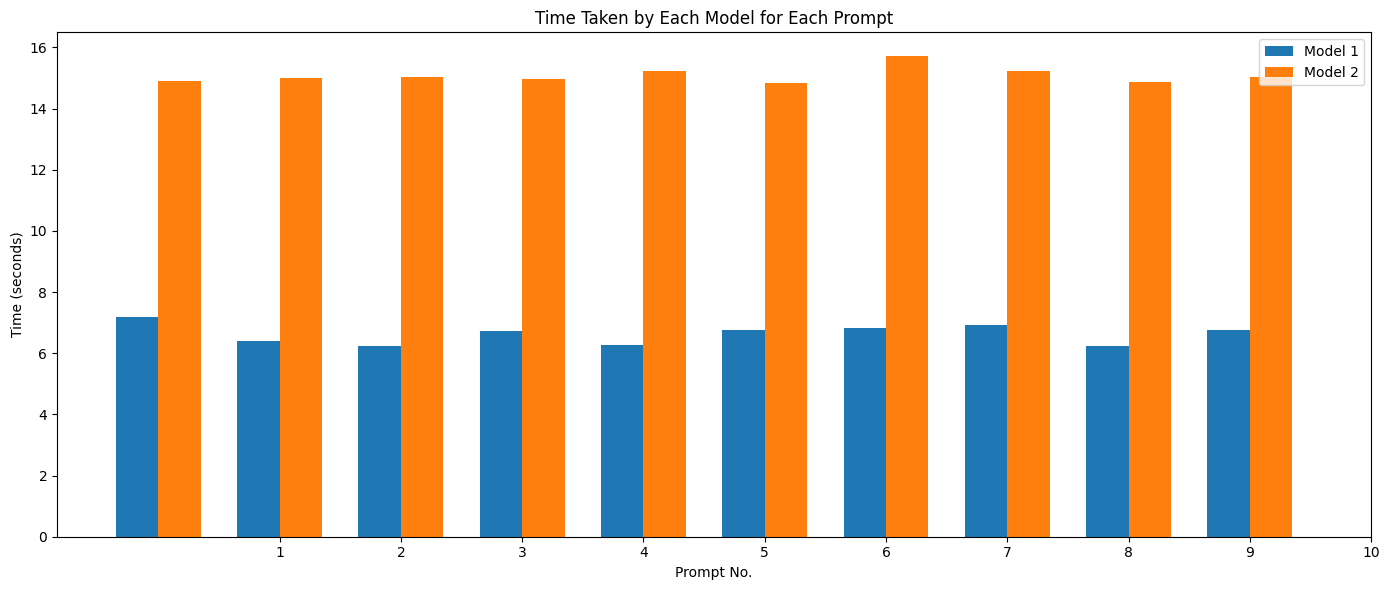

In [52]:
plt.figure(figsize=(14, 6))
x = np.arange(len(prompts))
width = 0.35
plt.bar(x - width/2, times_model_1, width, label='Model 1')
plt.bar(x + width/2, times_model_2, width, label='Model 2')
plt.xlabel("Prompt No.")
plt.ylabel('Time (seconds)')
plt.title('Time Taken by Each Model for Each Prompt')
plt.xticks(x+1)
plt.legend()
plt.tight_layout()
plt.show()

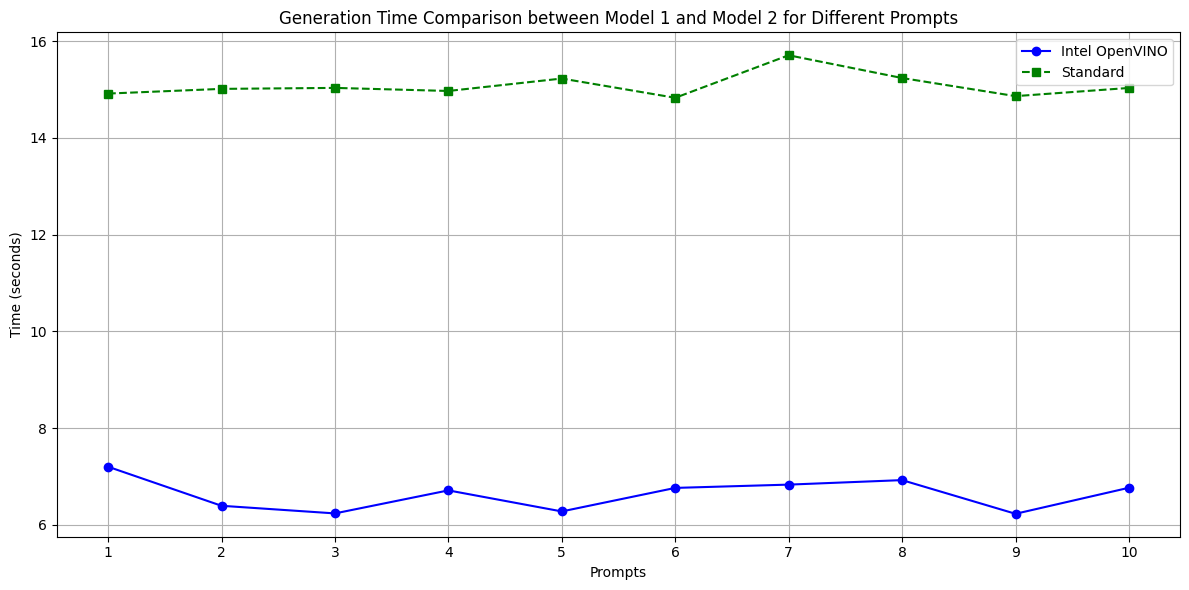

In [53]:
# Plotting times for each prompt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), times_model_1, marker='o', linestyle='-', color='b', label='Intel OpenVINO')
plt.plot(range(1, 11), times_model_2, marker='s', linestyle='--', color='g', label='Standard')
plt.xticks(range(1, 11))
plt.xlabel('Prompts')
plt.ylabel('Time (seconds)')
plt.title('Generation Time Comparison between Model 1 and Model 2 for Different Prompts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()